In [1]:
pip install datasets

DEPRECATION: celery 4.3.0 has a non-standard dependency specifier pytz>dev. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of celery or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
from datasets import load_dataset

import tqdm as notebook_tqdm

ds = load_dataset("imagefolder", data_dir="/Users/mdsharique/Downloads/train")

Resolving data files:   0%|          | 0/5219 [00:00<?, ?it/s]

In [3]:
type(ds)

datasets.dataset_dict.DatasetDict

In [4]:
ex = ds['train'][500]
ex

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=L size=1624x1299>,
 'label': 0}

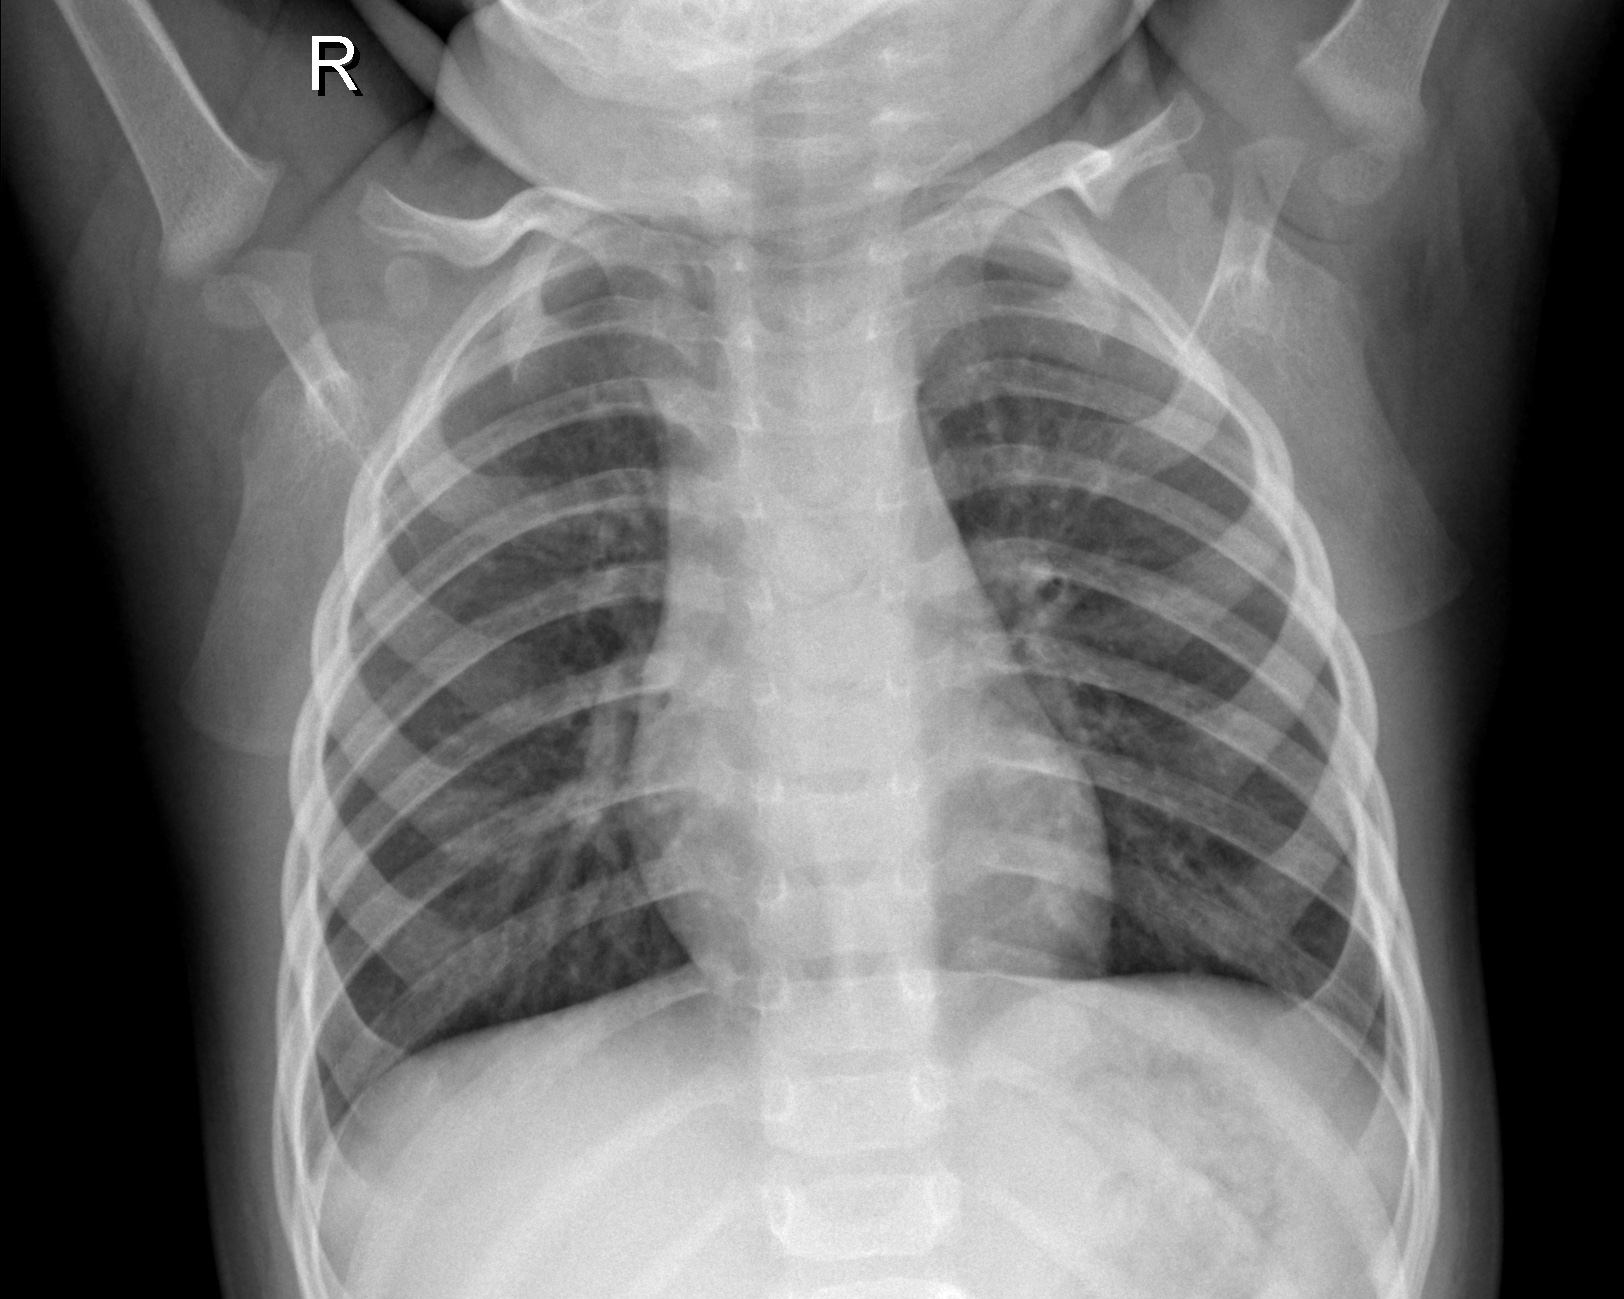

In [5]:
image = ex['image']
image

In [6]:
from PIL import Image

# Function to convert a single image to RGB mode
def convert_to_rgb(image):
    # Convert the image to RGB mode if it's not already in that mode
    if image.mode != "RGB":
        rgb_image = image.convert("RGB")
        return rgb_image
    else:
        return image  # Already in RGB mode

# Assuming ex['image'] is a list of PIL image objects
image = convert_to_rgb(image)


In [7]:
labels = ds['train'].features['label']
labels

ClassLabel(names=['normal', 'pneumonia'], id=None)

In [8]:
labels.int2str(ex['label'])

'normal'

In [17]:
from transformers import ViTImageProcessor

model_name_or_path = 'google/vit-base-patch16-224-in21k'
processor = ViTImageProcessor.from_pretrained(model_name_or_path)

RuntimeError: Failed to import transformers.models.vit.image_processing_vit because of the following error (look up to see its traceback):
module 'numpy' has no attribute 'typeDict'

In [14]:
print(processor)

NameError: name 'processor' is not defined

In [12]:
processor(image, return_tensors='pt')

{'pixel_values': tensor([[[[-0.6549, -0.5922, -0.5608,  ..., -0.8667, -0.9137, -0.9529],
          [-0.6549, -0.6078, -0.5686,  ..., -0.8824, -0.9294, -0.9686],
          [-0.6706, -0.6157, -0.5765,  ..., -0.8902, -0.9451, -0.9843],
          ...,
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.6549, -0.5922, -0.5608,  ..., -0.8667, -0.9137, -0.9529],
          [-0.6549, -0.6078, -0.5686,  ..., -0.8824, -0.9294, -0.9686],
          [-0.6706, -0.6157, -0.5765,  ..., -0.8902, -0.9451, -0.9843],
          ...,
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.6549, -0.5922, -0.5608,  ..., -0.8667, -0.9137, -0.9529],
          [-0

In [13]:
def process_example(example):
    inputs = processor(convert_to_rgb(example['image']), return_tensors='pt')
    inputs['labels'] = example['label']
    return inputs

In [14]:
ds['train'][0]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=L size=2090x1858>,
 'label': 0}

In [15]:
process_example(ds['train'][0])

{'pixel_values': tensor([[[[-0.8275, -0.8431, -0.8510,  ..., -0.2549, -0.2549, -0.2549],
          [-0.8275, -0.8353, -0.8510,  ..., -0.2706, -0.2549, -0.2549],
          [-0.8196, -0.8353, -0.8510,  ..., -0.2706, -0.2627, -0.2706],
          ...,
          [-0.7647, -0.7725, -0.7804,  ..., -0.5294, -0.5294, -0.5294],
          [-0.7255, -0.7255, -0.7333,  ..., -0.3647, -0.3569, -0.3569],
          [-0.6471, -0.6471, -0.6471,  ..., -0.1608, -0.1529, -0.1529]],

         [[-0.8275, -0.8431, -0.8510,  ..., -0.2549, -0.2549, -0.2549],
          [-0.8275, -0.8353, -0.8510,  ..., -0.2706, -0.2549, -0.2549],
          [-0.8196, -0.8353, -0.8510,  ..., -0.2706, -0.2627, -0.2706],
          ...,
          [-0.7647, -0.7725, -0.7804,  ..., -0.5294, -0.5294, -0.5294],
          [-0.7255, -0.7255, -0.7333,  ..., -0.3647, -0.3569, -0.3569],
          [-0.6471, -0.6471, -0.6471,  ..., -0.1608, -0.1529, -0.1529]],

         [[-0.8275, -0.8431, -0.8510,  ..., -0.2549, -0.2549, -0.2549],
          [-0

In [16]:
from PIL import Image

# Function to convert a single image to RGB mode
def convert_to_rgb2(image):
    # Convert the image to RGB mode if it's not already in that mode
    if image.mode != "RGB":
        rgb_image = image.convert("RGB")
        return rgb_image
    else:
        return image  # Already in RGB mode

# Assuming ex['image'] is a list of PIL image objects


In [17]:

def transform(example_batch):
    # Take a list of PIL images and turn them to pixel values
    inputs = processor([convert_to_rgb2(x) for x in example_batch['image']], return_tensors='pt')

    # Don't forget to include the labels!
    inputs['labels'] = example_batch['label']
    return inputs

In [18]:
prepared_ds = ds.with_transform(transform)

In [19]:
prepared_ds['train'][0:2]

{'pixel_values': tensor([[[[-0.8275, -0.8431, -0.8510,  ..., -0.2549, -0.2549, -0.2549],
          [-0.8275, -0.8353, -0.8510,  ..., -0.2706, -0.2549, -0.2549],
          [-0.8196, -0.8353, -0.8510,  ..., -0.2706, -0.2627, -0.2706],
          ...,
          [-0.7647, -0.7725, -0.7804,  ..., -0.5294, -0.5294, -0.5294],
          [-0.7255, -0.7255, -0.7333,  ..., -0.3647, -0.3569, -0.3569],
          [-0.6471, -0.6471, -0.6471,  ..., -0.1608, -0.1529, -0.1529]],

         [[-0.8275, -0.8431, -0.8510,  ..., -0.2549, -0.2549, -0.2549],
          [-0.8275, -0.8353, -0.8510,  ..., -0.2706, -0.2549, -0.2549],
          [-0.8196, -0.8353, -0.8510,  ..., -0.2706, -0.2627, -0.2706],
          ...,
          [-0.7647, -0.7725, -0.7804,  ..., -0.5294, -0.5294, -0.5294],
          [-0.7255, -0.7255, -0.7333,  ..., -0.3647, -0.3569, -0.3569],
          [-0.6471, -0.6471, -0.6471,  ..., -0.1608, -0.1529, -0.1529]],

         [[-0.8275, -0.8431, -0.8510,  ..., -0.2549, -0.2549, -0.2549],
          [-0

In [20]:
import torch

def collate_fn(batch):
    return {
        'pixel_values': torch.stack([x['pixel_values'] for x in batch]),
        'labels': torch.tensor([x['labels'] for x in batch])
    }

In [21]:
import numpy as np
from datasets import load_metric

metric = load_metric("accuracy")
def compute_metrics(p):
    return metric.compute(predictions=np.argmax(p.predictions, axis=1), references=p.label_ids)

/var/folders/9p/h8scp4rs2zq8dl_zx5br9qcm0000gn/T/ipykernel_19741/2425197347.py:4: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy")
/opt/anaconda3/lib/python3.11/site-packages/datasets/load.py:759: FutureWarning: The repository for accuracy contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.0/metrics/accuracy/accuracy.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


In [22]:
from transformers import ViTForImageClassification

labels = ds['train'].features['label'].names

model = ViTForImageClassification.from_pretrained(
    model_name_or_path,
    num_labels=len(labels),
    id2label={str(i): c for i, c in enumerate(labels)},
    label2id={c: str(i) for i, c in enumerate(labels)}
)

/opt/anaconda3/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [23]:
from transformers import TrainingArguments

training_args = TrainingArguments(
  output_dir="./vit-base-beans",
  per_device_train_batch_size=16,
  evaluation_strategy="steps",
  num_train_epochs=4,
  save_steps=100,
  eval_steps=100,
  logging_steps=10,
  learning_rate=2e-4,
  save_total_limit=2,
  remove_unused_columns=False,
  push_to_hub=False,
  report_to='tensorboard',
  load_best_model_at_end=True,
)

In [24]:
val = load_dataset("imagefolder", data_dir="/Users/aritra/Downloads/vit/val")

In [25]:
prepared_val = val.with_transform(transform)

In [26]:
prepared_val['train'][0:2]

{'pixel_values': tensor([[[[-0.6314, -0.6706, -0.7725,  ..., -0.3804, -0.4353, -0.4902],
          [-0.7647, -0.8588, -0.7569,  ..., -0.4039, -0.4431, -0.5137],
          [-0.6863, -0.6549, -0.8510,  ..., -0.4196, -0.4667, -0.5216],
          ...,
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-0.9216, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.6314, -0.6706, -0.7725,  ..., -0.3804, -0.4353, -0.4902],
          [-0.7647, -0.8588, -0.7569,  ..., -0.4039, -0.4431, -0.5137],
          [-0.6863, -0.6549, -0.8510,  ..., -0.4196, -0.4667, -0.5216],
          ...,
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-0.9216, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]],

         [[-0.6314, -0.6706, -0.7725,  ..., -0.3804, -0.4353, -0.4902],
          [-0

In [27]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    train_dataset=prepared_ds["train"],
    eval_dataset=prepared_val["train"],
    tokenizer=processor,
)

In [28]:
train_results = trainer.train()
trainer.save_model()
trainer.log_metrics("train", train_results.metrics)
trainer.save_metrics("train", train_results.metrics)
trainer.save_state()

  0%|          | 0/327 [00:00<?, ?it/s]

{'loss': 0.3758, 'grad_norm': 5.625232696533203, 'learning_rate': 0.00019388379204892967, 'epoch': 0.03}
{'loss': 0.2901, 'grad_norm': 2.518620014190674, 'learning_rate': 0.00018776758409785933, 'epoch': 0.06}
{'loss': 0.1699, 'grad_norm': 4.359992980957031, 'learning_rate': 0.000181651376146789, 'epoch': 0.09}
{'loss': 0.1336, 'grad_norm': 3.3248655796051025, 'learning_rate': 0.00017553516819571866, 'epoch': 0.12}
{'loss': 0.1388, 'grad_norm': 1.6240311861038208, 'learning_rate': 0.00016941896024464832, 'epoch': 0.15}
{'loss': 0.1696, 'grad_norm': 0.6079652905464172, 'learning_rate': 0.00016330275229357798, 'epoch': 0.18}
{'loss': 0.1939, 'grad_norm': 1.9216766357421875, 'learning_rate': 0.00015718654434250767, 'epoch': 0.21}
{'loss': 0.1967, 'grad_norm': 0.8101787567138672, 'learning_rate': 0.0001510703363914373, 'epoch': 0.24}
{'loss': 0.1483, 'grad_norm': 6.95474910736084, 'learning_rate': 0.00014495412844036697, 'epoch': 0.28}
{'loss': 0.2038, 'grad_norm': 3.6607346534729004, 'lea

  0%|          | 0/2 [00:00<?, ?it/s]

{'eval_loss': 1.067337989807129, 'eval_accuracy': 0.625, 'eval_runtime': 4.4063, 'eval_samples_per_second': 3.631, 'eval_steps_per_second': 0.454, 'epoch': 0.31}
{'loss': 0.1525, 'grad_norm': 1.3538846969604492, 'learning_rate': 0.00013272171253822632, 'epoch': 0.34}
{'loss': 0.0811, 'grad_norm': 0.18793734908103943, 'learning_rate': 0.00012660550458715598, 'epoch': 0.37}
{'loss': 0.0706, 'grad_norm': 0.10119248926639557, 'learning_rate': 0.00012048929663608564, 'epoch': 0.4}
{'loss': 0.1601, 'grad_norm': 0.14198729395866394, 'learning_rate': 0.0001143730886850153, 'epoch': 0.43}
{'loss': 0.134, 'grad_norm': 1.4186218976974487, 'learning_rate': 0.00010825688073394495, 'epoch': 0.46}
{'loss': 0.1066, 'grad_norm': 0.12162606418132782, 'learning_rate': 0.00010214067278287463, 'epoch': 0.49}
{'loss': 0.0948, 'grad_norm': 3.7565197944641113, 'learning_rate': 9.602446483180429e-05, 'epoch': 0.52}
{'loss': 0.1579, 'grad_norm': 0.8492370247840881, 'learning_rate': 8.990825688073395e-05, 'epoch

  0%|          | 0/2 [00:00<?, ?it/s]

{'eval_loss': 1.1419676542282104, 'eval_accuracy': 0.6875, 'eval_runtime': 1.573, 'eval_samples_per_second': 10.171, 'eval_steps_per_second': 1.271, 'epoch': 0.61}
{'loss': 0.0522, 'grad_norm': 0.056208834052085876, 'learning_rate': 7.155963302752295e-05, 'epoch': 0.64}
{'loss': 0.1473, 'grad_norm': 1.035367727279663, 'learning_rate': 6.54434250764526e-05, 'epoch': 0.67}
{'loss': 0.175, 'grad_norm': 4.744511604309082, 'learning_rate': 5.932721712538226e-05, 'epoch': 0.7}
{'loss': 0.127, 'grad_norm': 0.21716570854187012, 'learning_rate': 5.3211009174311934e-05, 'epoch': 0.73}
{'loss': 0.0274, 'grad_norm': 0.11021128296852112, 'learning_rate': 4.709480122324159e-05, 'epoch': 0.76}
{'loss': 0.0349, 'grad_norm': 0.09433996677398682, 'learning_rate': 4.097859327217126e-05, 'epoch': 0.8}
{'loss': 0.0665, 'grad_norm': 0.6572420001029968, 'learning_rate': 3.486238532110092e-05, 'epoch': 0.83}
{'loss': 0.0578, 'grad_norm': 0.0748414546251297, 'learning_rate': 2.874617737003058e-05, 'epoch': 0.8

  0%|          | 0/2 [00:00<?, ?it/s]

{'eval_loss': 0.4437095522880554, 'eval_accuracy': 0.8125, 'eval_runtime': 2.2341, 'eval_samples_per_second': 7.162, 'eval_steps_per_second': 0.895, 'epoch': 0.92}
{'loss': 0.0679, 'grad_norm': 0.09786966443061829, 'learning_rate': 1.0397553516819572e-05, 'epoch': 0.95}
{'loss': 0.0671, 'grad_norm': 0.1164107471704483, 'learning_rate': 4.281345565749235e-06, 'epoch': 0.98}
{'train_runtime': 6924.6968, 'train_samples_per_second': 0.754, 'train_steps_per_second': 0.047, 'train_loss': 0.12415037342896884, 'epoch': 1.0}
***** train metrics *****
  epoch                    =         1.0
  total_flos               = 376655435GF
  train_loss               =      0.1242
  train_runtime            =  1:55:24.69
  train_samples_per_second =       0.754
  train_steps_per_second   =       0.047


In [29]:
metrics = trainer.evaluate(prepared_val['train'])
trainer.log_metrics("eval", metrics)
trainer.save_metrics("eval", metrics)

  0%|          | 0/2 [00:00<?, ?it/s]

***** eval metrics *****
  epoch                   =        1.0
  eval_accuracy           =     0.8125
  eval_loss               =     0.4437
  eval_runtime            = 0:00:02.23
  eval_samples_per_second =      7.158
  eval_steps_per_second   =      0.895
